# Reperire i dati

Usando [Requests](https://requests.kennethreitz.org/).

In [1]:
import requests

In [2]:
import datetime

today = datetime.date.today()
one_week_ago = today - datetime.timedelta(weeks = 1)

params = {
    'q': 'ospedale',
    'start_date': one_week_ago.strftime('%d/%m/%Y'),
    'end_date': today.strftime('%d/%m/%Y')
}
params

{'q': 'ospedale', 'start_date': '18/10/2019', 'end_date': '25/10/2019'}

In [3]:
resp = requests.get(
    'https://www.ecodibergamo.it/ricerca/', 
    params = params
)
resp.text[:100]

'\n\n\n\n\n\n\n\n\n    <!doctype html>\n    \n    <html xmlns:fb="https://www.facebook.com/2008/fbml" xml:lang="'

# Estrarre informazioni

Usando [lxml](https://lxml.de/).

In [4]:
from lxml import html

tree = html.fromstring(resp.content)

In [5]:
# /html/body/div[6]/div[3]/article/header/h2/ax

res = list(tree.xpath('//article/header/h2/a'))
elem = res[1]

' '.join(map(lambda t: t.strip(), elem.itertext()))

'Una notte insonne vale due vite Due maxi interventi in Cardiochirurgia'

In [6]:
for elem in tree.xpath('//article/header/h2/a'):
    text = ' '.join(map(lambda _: _.strip(), elem.itertext())).strip()
    print(text)

Si sente male mentre è al lavoro Muore 46enne di Dalmine
Una notte insonne vale due vite Due maxi interventi in Cardiochirurgia
Verdellino, investito un pedone Grave un uomo di 40 anni
Schianto tra un camion e un furgone Traffico in tilt sulla  tangenziale Sud


Usando [Requests-HTML](https://requests-html.kennethreitz.org/)…

In [7]:
from requests_html import HTMLSession

session = HTMLSession()

library_url = 'https://docs.python.org/3/library/'

res = session.get(library_url)

In [8]:
list(res.html.absolute_links)[:10]

['https://docs.python.org/3/library/test.html#module-test.support',
 'https://docs.python.org/3/library/language.html',
 'https://docs.python.org/3/library/secrets.html',
 'https://docs.python.org/3/library/undoc.html#platform-specific-modules',
 'https://docs.python.org/3/library/gettext.html',
 'https://docs.python.org/3/library/internet.html',
 'https://docs.python.org/3/library/contextvars.html#context-variables',
 'https://docs.python.org/3/library/filecmp.html',
 'https://docs.python.org/3/library/tracemalloc.html',
 'https://docs.python.org/3/library/urllib.robotparser.html']

In [9]:
# li.toctree-l1:nth-child(4) > a:nth-child(1)

list(res.html.find('li.toctree-l1 > a'))

[<Element 'a' class=('reference', 'internal') href='intro.html'>,
 <Element 'a' class=('reference', 'internal') href='functions.html'>,
 <Element 'a' class=('reference', 'internal') href='constants.html'>,
 <Element 'a' class=('reference', 'internal') href='stdtypes.html'>,
 <Element 'a' class=('reference', 'internal') href='exceptions.html'>,
 <Element 'a' class=('reference', 'internal') href='text.html'>,
 <Element 'a' class=('reference', 'internal') href='binary.html'>,
 <Element 'a' class=('reference', 'internal') href='datatypes.html'>,
 <Element 'a' class=('reference', 'internal') href='numeric.html'>,
 <Element 'a' class=('reference', 'internal') href='functional.html'>,
 <Element 'a' class=('reference', 'internal') href='filesys.html'>,
 <Element 'a' class=('reference', 'internal') href='persistence.html'>,
 <Element 'a' class=('reference', 'internal') href='archiving.html'>,
 <Element 'a' class=('reference', 'internal') href='fileformats.html'>,
 <Element 'a' class=('reference

In [10]:
titles = [
    (li.text, li.attrs['href']) 
        for li in res.html.find('li.toctree-l1 > a')
]
titles

[('Introduction', 'intro.html'),
 ('Built-in Functions', 'functions.html'),
 ('Built-in Constants', 'constants.html'),
 ('Built-in Types', 'stdtypes.html'),
 ('Built-in Exceptions', 'exceptions.html'),
 ('Text Processing Services', 'text.html'),
 ('Binary Data Services', 'binary.html'),
 ('Data Types', 'datatypes.html'),
 ('Numeric and Mathematical Modules', 'numeric.html'),
 ('Functional Programming Modules', 'functional.html'),
 ('File and Directory Access', 'filesys.html'),
 ('Data Persistence', 'persistence.html'),
 ('Data Compression and Archiving', 'archiving.html'),
 ('File Formats', 'fileformats.html'),
 ('Cryptographic Services', 'crypto.html'),
 ('Generic Operating System Services', 'allos.html'),
 ('Concurrent Execution', 'concurrency.html'),
 ('contextvars — Context Variables', 'contextvars.html'),
 ('Networking and Interprocess Communication', 'ipc.html'),
 ('Internet Data Handling', 'netdata.html'),
 ('Structured Markup Processing Tools', 'markup.html'),
 ('Internet Proto

In [11]:
from IPython.display import HTML

lis = '<li>'.join(
    f'<a target="_blank" href="{library_url}{link}">{title}</a>' 
for title, link in titles)

HTML(f'<ul><li>{lis}</ul>')

# Intermezzo, display avanzato

Da [IPython.display](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#module-IPython.display)…

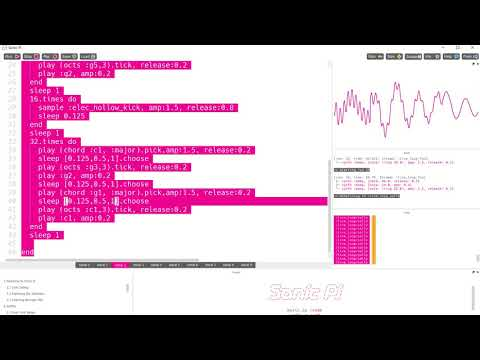

In [12]:
from IPython.display import YouTubeVideo

YouTubeVideo('g0kgLNmrHx4')

In [13]:
from IPython.display import Audio

Audio(url = 'https://file-examples.com/wp-content/uploads/2017/11/file_example_MP3_700KB.mp3')

In [14]:
from IPython.display import Code

Code("""
#include <stdio.h>

int main(void) {
    printf("Hello, world!");
    return 0;
}
""")

#include <stdio.h>

int main(void) {
    printf("Hello, world!");
    return 0;
}

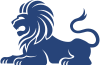

In [32]:
from IPython.display import SVG

SVG(url = 'https://upload.wikimedia.org/wikipedia/commons/f/fb/Banc_de_Binary_Lion.svg')